# iris

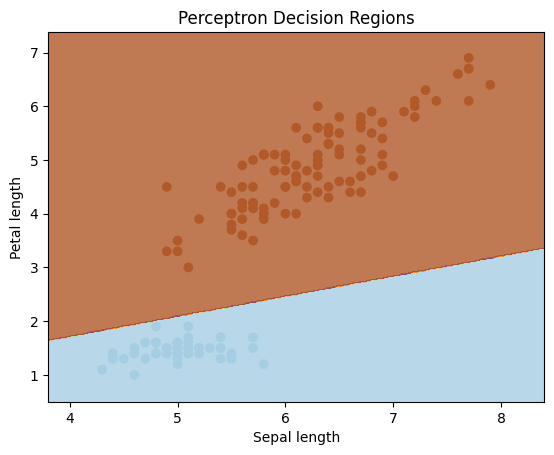

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

y = np.where(y == 0, 0, 1)


w = np.zeros(2)
b = 0


lr = 0.1
epochs = 50


def perceptron(x, w, b):

    z = np.dot(x, w) + b

    return np.where(z >= 0, 1, 0)


for epoch in range(epochs):
    for i in range(len(X)):
        x = X[i]
        target = y[i]
        output = perceptron(x, w, b)
        error = target - output
        w += lr * error * x
        b += lr * error


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = perceptron(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)


plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Perceptron Decision Regions')


plt.show()


In [4]:
import pandas as pd
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

# Wine

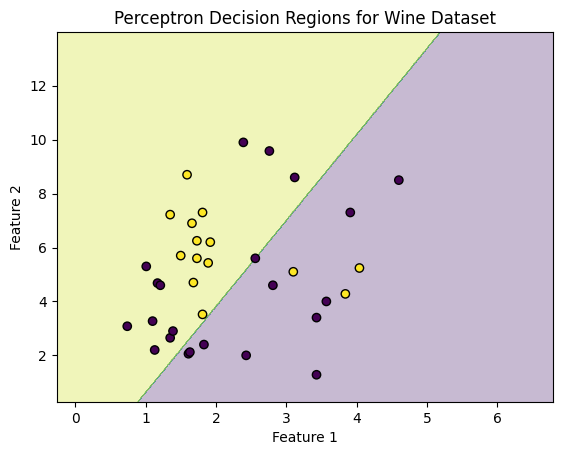

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load wine dataset
wine = load_wine()

# Extract two features (you can modify the feature indices as needed)
X = wine.data[:, [1, 9]]
y = (wine.target == 0).astype(int)  # Binary classification based on target value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias
w = np.zeros(X_train.shape[1])
b = 0

# Set learning rate and number of epochs
learning_rate = 0.1
epochs = 50

# Define perceptron function
def perceptron(x, w, b):
    z = np.dot(x, w) + b
    return np.where(z >= 0, 1, 0)

# Train the perceptron
for epoch in range(epochs):
    for i in range(len(X_train)):
        x = X_train[i]
        target = y_train[i]
        output = perceptron(x, w, b)
        error = target - output
        w += learning_rate * error * x
        b += learning_rate * error

# Plot decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Regions for Wine Dataset')
plt.show()
